In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
data=mnist.load_data()

In [3]:
(xtrain,ytrain),(xtest,ytest)=data

In [4]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
ytrain.shape

(60000,)

In [7]:
xtest.shape

(10000, 28, 28)

In [8]:
ytest.shape

(10000,)

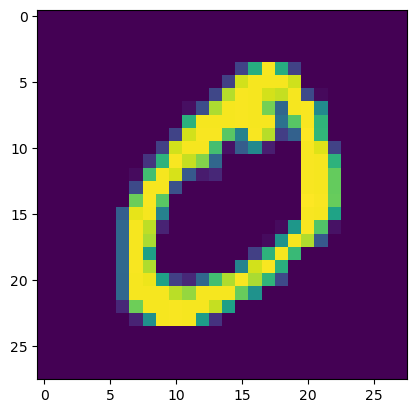

In [9]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[1])

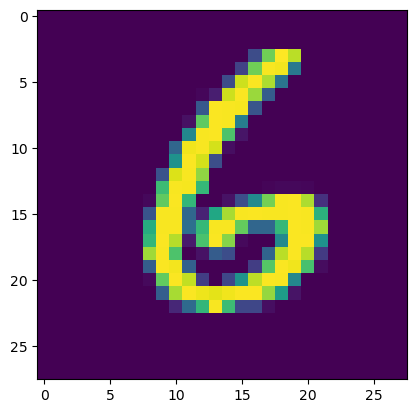

In [10]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[6000])

### model Building

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy 

In [12]:
model=Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(units=700,activation='relu'))
model.add(Dense(units=600,activation='relu'))
model.add(Dense(units=300,activation='relu'))
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=10,activation='sigmoid'))

C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])
#SparseCategoricalCrossentropy used to catch the loss happening .

In [14]:
performance=model.fit(xtrain,ytrain,epochs=3
                      ,validation_data=(xtest,ytest))

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - accuracy: 0.8507 - loss: 1.3867 - val_accuracy: 0.9441 - val_loss: 0.1933
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9554 - loss: 0.1569 - val_accuracy: 0.9564 - val_loss: 0.1490
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9637 - loss: 0.1297 - val_accuracy: 0.9608 - val_loss: 0.1435


In [15]:
performance.history

{'accuracy': [0.9086499810218811, 0.953249990940094, 0.9625999927520752],
 'loss': [0.4807507395744324, 0.16803951561450958, 0.13616609573364258],
 'val_accuracy': [0.944100022315979, 0.9563999772071838, 0.9607999920845032],
 'val_loss': [0.19329708814620972, 0.14902257919311523, 0.14346101880073547]}

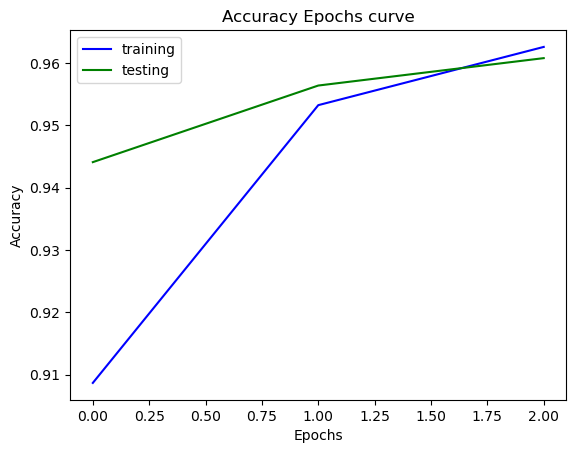

In [16]:
plt.plot(performance.history['accuracy'],color='b',label='training')
plt.plot(performance.history['val_accuracy'],color='g',label='testing')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Epochs curve')

plt.show()